<a href="https://colab.research.google.com/github/Faith-InsightData/Loan-default/blob/main/Copy_of_Data_Preprocessing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Preprocessing

## Objective

Data preprocessing is a critical step in the machine learning pipeline. It involves cleaning and transforming raw data into a suitable format for modeling. This notebook aims to provide hands-on experience in preprocessing data, focusing on handling missing values, scaling features, encoding categorical variables, and more.

## Key Objectives

1. **Understand Data**: Familiarize with the dataset and its characteristics.
2. **Handle Missing Values**: Identify and treat missing data in different columns.
3. **Feature Encoding**: Convert categorical variables into numerical formats suitable for machine learning models.
4. **Feature Scaling**: Normalize or standardize numerical values to improve model performance.
5. **Data Splitting**: Prepare the dataset for training and testing to evaluate the performance of machine learning models.

## Dataset Description

The dataset provided is a collection of loan application records, which can be used to predict the likelihood of a default. Here is a brief description of each column in the dataset:

- **TARGET**: Binary indicator where '1' represents a default on a loan and '0' represents a non-default. This is the label for our predictive modeling.
- **NAME_CONTRACT_TYPE**: Type of loan contracted. Categorical variable (e.g., 'Cash loans', 'Revolving loans').
- **CODE_GENDER**: Gender of the applicant. Categorical variable ('M' for male, 'F' for female).
- **FLAG_OWN_CAR**: Indicates whether the applicant owns a car ('Y' for yes, 'N' for no, missing in some records).
- **FLAG_OWN_REALTY**: Indicates whether the applicant owns real estate ('Y' for yes, 'N' for no).
- **CNT_CHILDREN**: Number of children the applicant has.
- **AMT_INCOME_TOTAL**: Total annual income of the applicant. Some records are missing.
- **AMT_CREDIT**: Credit amount of the loan taken.
- **AMT_ANNUITY**: Loan annuity.
- **DAYS_BIRTH**: Applicant's age in days at the time of application (negative values indicating the age).
- **YEARS_EMPLOYED**: Number of years the applicant has been employed.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("loan_default.csv")

## Understanding the Dataset

In this section, we'll dive into understanding some crucial aspects of our dataset. This foundational knowledge is key to effective preprocessing and ultimately, to building robust machine learning models. Here are the areas we will focus on:

- **Data Shape and Structure**: Understanding the size of the dataset and the structure of the data tables. It’s important to know how many instances (rows) and features (columns) we have.
  
- **Summary Statistics**: By examining the central tendency and spread of numeric features, we can gain insights into the general distribution and scale of our data.

- **Data Types**: Different data types require different preprocessing methods. We will identify which columns are numerical, categorical, or boolean to tailor our preprocessing techniques appropriately.

- **Missing Values**: Identifying missing values is crucial as they can significantly impact the performance of machine learning models. We'll need to decide how to handle these, whether by imputation, deletion, or some other method.

- **Unique Values and Cardinality**: Understanding the uniqueness of data, especially for categorical data, helps in determining how to handle encoding and can reveal insights about the dataset’s granularity.

- **Potential Errors or Outliers**: Early detection of anomalies or outliers can help us understand data collection errors or exceptional cases, which may require special handling or exclusion to avoid skewing our model results.

- **Initial Observations**: We'll note any initial observations that may require deeper analysis or might impact how we choose to preprocess the data.

Understanding these elements will set the stage for the data cleaning and preparation tasks that follow, ensuring that we approach the preprocessing with a comprehensive understanding of our dataset’s characteristics.


In [ ]:
# Display the first few rows of the dataset to understand what the data looks like
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,YEARS_EMPLOYED
0,0.0,Cash loans,M,Y,N,1,225000.0,578619.0,23229.0,-12347,0
1,0.0,Revolving loans,M,Y,Y,1,NaN,270000.0,13500.0,-14048,6
2,0.0,Cash loans,M,Y,N,0,144000.0,753840.0,29340.0,-14639,6
3,0.0,Cash loans,F,N,Y,0,81000.0,98910.0,7785.0,-14591,11
4,0.0,Cash loans,F,N,Y,1,103500.0,521280.0,26779.5,-12023,0


In [ ]:
# Display the shape of the dataset
print("\nShape of the dataset:")
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")


Shape of the dataset:
There are 10284 rows and 11 columns.


In [ ]:
# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
data.describe().T



Summary Statistics for Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
TARGET,10281.0,0.079078,0.269873,0.0,0.000,0.0,0.0,1.0
CNT_CHILDREN,10284.0,10.287340,986.138233,0.0,0.000,0.0,1.0,99999.0
AMT_INCOME_TOTAL,6993.0,167909.947902,105245.713874,27000.0,112500.000,144000.0,202500.0,3825000.0
AMT_CREDIT,10284.0,599902.578326,400843.758473,45000.0,270000.000,512446.5,810000.0,4050000.0
AMT_ANNUITY,10284.0,27191.230747,14933.326225,2974.5,16509.375,25128.0,34596.0,258025.5
DAYS_BIRTH,10284.0,-16055.232400,4377.738214,-25166.0,-19724.250,-15733.5,-12352.0,-7680.0
YEARS_EMPLOYED,10284.0,-176.848016,388.125395,-1000.0,0.000,3.0,7.0,150.0


## Summary Statistics for Numeric Columns

- **TARGET**: This is a binary variable where '1' indicates a default on a loan and '0' indicates no default. The mean of approximately 0.08 suggests that about 8% of the entries are defaults.
- **CNT_CHILDREN**: The count of children ranges widely from 0 to 99,999, with a mean close to 10. This unusually high maximum might indicate an error or outlier.
- **AMT_INCOME_TOTAL**: Total income ranges from 27,000 to 3,825,000, with a significant standard deviation, suggesting wide disparity in applicants' income levels.
- **AMT_CREDIT**: The loan credit amount varies from 45,000 to 4,050,000, highlighting the broad range of loan amounts processed.
- **AMT_ANNUITY**: Annuities range from 2,974.5 to 258,025.5, showing what borrowers pay periodically, with a mean of about 27,191.
- **DAYS_BIRTH**: The days since birth (negative values indicating age) range from -25,166 to -7,680, which corresponds to ages approximately between 20 and 69 years.
- **YEARS_EMPLOYED**: Employment duration ranges from -1,000 to 150 years, where negative values may indicate errors or specific data entry conventions needing clarification.



In [ ]:
# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
TARGET                   3
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
FLAG_OWN_CAR          2262
FLAG_OWN_REALTY         30
CNT_CHILDREN             0
AMT_INCOME_TOTAL      3291
AMT_CREDIT               0
AMT_ANNUITY              0
DAYS_BIRTH               0
YEARS_EMPLOYED           0
dtype: int64


## Missing Values Analysis

Missing data can significantly affect the outcomes of our analysis and predictive modeling. Here's a breakdown of missing values across different columns in the dataset:

- **TARGET**: 3 missing values. This is crucial as 'TARGET' is our dependent variable. We need to decide whether to impute these values or remove the corresponding records.
- **NAME_CONTRACT_TYPE**, **CODE_GENDER**, **FLAG_OWN_REALTY**, **CNT_CHILDREN**, **AMT_CREDIT**, **AMT_ANNUITY**, **DAYS_BIRTH**, **YEARS_EMPLOYED**: No missing values, which simplifies preprocessing for these columns.
- **FLAG_OWN_CAR**: 2,262 missing values. We need to determine whether this is due to the data collection process or other reasons, and decide on an appropriate imputation strategy.
- **FLAG_OWN_REALTY**: 30 missing values. Considering the small number relative to the dataset size, we might opt for simple imputation methods like mode replacement.
- **AMT_INCOME_TOTAL**: 3,291 missing values, a significant number that requires careful consideration for imputation, as it could impact any analysis related to the applicant's income.

In [ ]:
# Check the number of unique values in each column to understand cardinality
print("\nUnique Values in Each Column:")
print(data.nunique())


Unique Values in Each Column:
TARGET                   2
NAME_CONTRACT_TYPE       2
CODE_GENDER              2
FLAG_OWN_CAR             2
FLAG_OWN_REALTY          4
CNT_CHILDREN            13
AMT_INCOME_TOTAL       260
AMT_CREDIT            1860
AMT_ANNUITY           4279
DAYS_BIRTH            7604
YEARS_EMPLOYED          46
dtype: int64


## Cardinality Analysis

Cardinality refers to the number of unique values in a column. Understanding cardinality is important for identifying features with a wide range of values and those with limited variety, which influences how we might process and use these features in machine learning models. Below is a summary of the cardinality in each column of our dataset:

- **TARGET**: 2 unique values. This binary variable indicates whether a loan defaulted or not, suitable for classification tasks.
- **NAME_CONTRACT_TYPE**: 2 unique values. Indicates the type of loan, either 'Cash loans' or 'Revolving loans'.
- **CODE_GENDER**: 2 unique values, typically 'M' for male and 'F' for female.
- **FLAG_OWN_CAR**: 2 unique values, indicating car ownership ('Y' for yes and 'N' for no).
- **FLAG_OWN_REALTY**: 4 unique values, suggesting some categories or errors since typically this should be 'Y' or 'N'.
- **CNT_CHILDREN**: 13 unique values, showing the number of children ranging from 0 to a higher number, affecting applicants' financial responsibilities.
- **AMT_INCOME_TOTAL**: 260 unique values. The income amounts vary significantly, which could reflect different economic statuses.
- **AMT_CREDIT**: 1,860 unique values, showing a wide variety of loan amounts.
- **AMT_ANNUITY**: 4,279 unique values, indicating varied periodic repayments plans.
- **DAYS_BIRTH**: 7,604 unique values, translating directly to the age of the clients.
- **YEARS_EMPLOYED**: 46 unique values, showing diverse employment durations among applicants.

The high cardinality in columns like `AMT_CREDIT`, `AMT_ANNUITY`, and `DAYS_BIRTH` indicates continuous numerical data, which may require binning or scaling during preprocessing. Conversely, low-cardinality columns like `TARGET` or `CODE_GENDER` might be more straightforward to handle but are crucial for any analytical or predictive modeling process.


In [ ]:
data.FLAG_OWN_REALTY.unique()

array(['N', 'Y', nan, 'YES', 'NO'], dtype=object)

## Treating Inconsistencies in `FLAG_OWN_REALTY`

The `FLAG_OWN_REALTY` column indicates whether the applicant owns real estate, which should be a straightforward binary 'Yes' or 'No' answer. However, a closer inspection reveals inconsistencies in how the data is entered, with variations such as 'Y', 'N', 'YES', 'NO', and missing values. Standardizing this column is crucial for accurate analysis and modeling. Here are the steps we'll take:

**Standardization**: Convert all variations to a uniform format ('Y' and 'N').


In [ ]:
# Mapping the values to standard form
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace({'YES': 'Y', 'NO': 'N'})

In [ ]:
data.FLAG_OWN_REALTY.unique()

array(['N', 'Y', nan], dtype=object)

## Treating Missing Values in the Dataset

Missing values can introduce bias and affect the performance of machine learning models. We have identified missing values in several key columns that need to be addressed before further analysis.

### `TARGET` Column
The `TARGET` column, which is our dependent variable, has 3 missing entries. Given the small number of missing values relative to the dataset size, and the importance of having complete labels for all training instances in supervised learning, the most appropriate action is to drop these rows.

### `FLAG_OWN_CAR` Column
The `FLAG_OWN_CAR` column, which indicates whether the applicant owns a car, contains 2,262 missing entries. Since this is a categorical variable, we will impute the missing values using the mode of this column, representing the most common category.

### `AMT_INCOME_TOTAL` Column
For the `AMT_INCOME_TOTAL` column, which represents the total income of the applicant and has 3,291 missing values, we will use the median to impute these values. The median is preferred over the mean as it is more robust to outliers, which are evident from the wide range of income values present in our dataset.



In [ ]:
# Drop rows where 'TARGET' is missing
data.dropna(subset=['TARGET'], inplace=True)

# Impute missing values in 'FLAG_OWN_CAR' with the mode
car_mode = data['FLAG_OWN_CAR'].mode()[0]
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].fillna(car_mode)

# Impute missing values in 'AMT_INCOME_TOTAL' with the median
income_median = data['AMT_INCOME_TOTAL'].median()
data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL'].fillna(income_median)

# Display the summary to verify changes
print(data.isnull().sum())


TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY       30
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
DAYS_BIRTH             0
YEARS_EMPLOYED         0
dtype: int64


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'loan_default.csv'
df = pd.read_csv(file_path)

# Checking the initial structure of the dataset
df.info()

# Checking the missing values in the relevant columns
missing_values = df[['FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL']].isnull().sum()
missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10284 entries, 0 to 10283
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              10281 non-null  float64
 1   NAME_CONTRACT_TYPE  10284 non-null  object 
 2   CODE_GENDER         10284 non-null  object 
 3   FLAG_OWN_CAR        8022 non-null   object 
 4   FLAG_OWN_REALTY     10254 non-null  object 
 5   CNT_CHILDREN        10284 non-null  int64  
 6   AMT_INCOME_TOTAL    6993 non-null   float64
 7   AMT_CREDIT          10284 non-null  float64
 8   AMT_ANNUITY         10284 non-null  float64
 9   DAYS_BIRTH          10284 non-null  int64  
 10  YEARS_EMPLOYED      10284 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 883.9+ KB


,0
FLAG_OWN_REALTY,30
AMT_INCOME_TOTAL,3291


In [ ]:
from sklearn.impute import KNNImputer

# Select the columns for KNN Imputation (including the target column to ensure relevant features are considered)
columns_for_imputation = ['FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'TARGET', 'YEARS_EMPLOYED', 'AMT_CREDIT', 'CNT_CHILDREN']

# Convert categorical variables to numeric where necessary (e.g., FLAG_OWN_REALTY) for KNN
df_knn = df[columns_for_imputation].copy()
df_knn['FLAG_OWN_REALTY'] = df_knn['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0 if x == 'N' else None)

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=columns_for_imputation)

# Convert FLAG_OWN_REALTY back to original categories
df_knn_imputed['FLAG_OWN_REALTY'] = df_knn_imputed['FLAG_OWN_REALTY'].apply(lambda x: 'Y' if x >= 0.5 else 'N')

# Replace the original missing values in the dataset with the imputed ones
df['FLAG_OWN_REALTY'] = df_knn_imputed['FLAG_OWN_REALTY']
df['AMT_INCOME_TOTAL'] = df_knn_imputed['AMT_INCOME_TOTAL']

# Checking if the missing values have been filled
df[['FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL']].isnull().sum()


,0
FLAG_OWN_REALTY,0
AMT_INCOME_TOTAL,0


 Overview of the YEARS_EMPLOYED Column

In [ ]:
# Describe the 'YEARS_EMPLOYED' column to get an overview of its statistics
df['YEARS_EMPLOYED'].describe()


,YEARS_EMPLOYED
count,10284.000000
mean,-176.848016
std,388.125395
min,-1000.000000
25%,0.000000
50%,3.000000
75%,7.000000
max,150.000000


Number of extreme values (years employed

In [ ]:
# Define a threshold for what is considered an extreme value in years employed
threshold_years = 50

# Count the number of extreme values
extreme_values_count = df[df['YEARS_EMPLOYED'] > threshold_years].shape[0]
print(f"Number of extreme values (years employed > {threshold_years}):", extreme_values_count)


Number of extreme values (years employed > 50): 1


In [ ]:
# Remove rows where 'YEARS_EMPLOYED' exceeds the threshold
df_cleaned = df[df['YEARS_EMPLOYED'] <= threshold_years]


In [ ]:
# Cap the 'YEARS_EMPLOYED' to the threshold value
df_capped = df.copy()
df_capped['YEARS_EMPLOYED'] = np.where(df_capped['YEARS_EMPLOYED'] > threshold_years, threshold_years, df_capped['YEARS_EMPLOYED'])


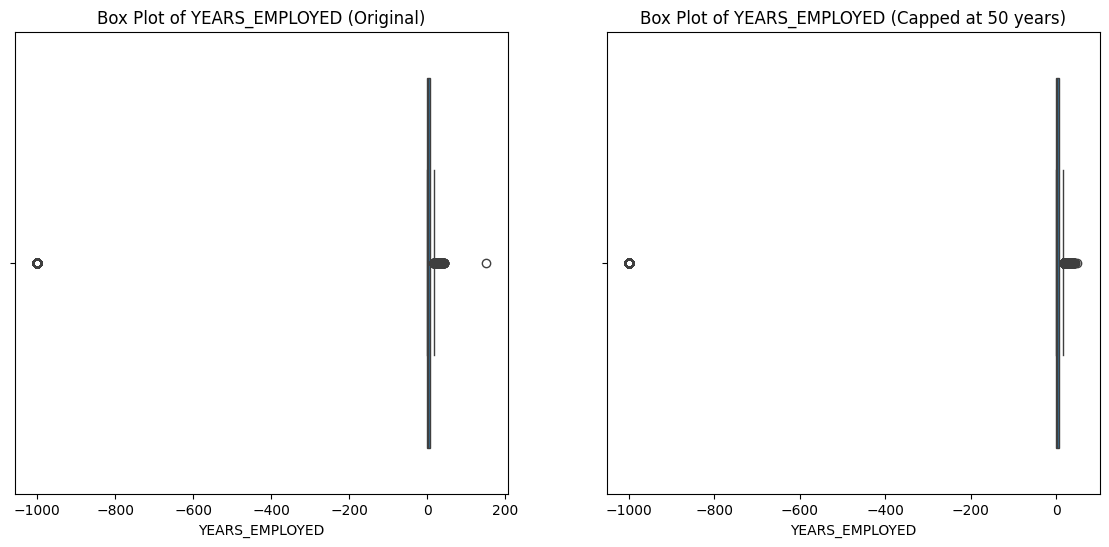

In [ ]:
plt.figure(figsize=(14, 6))

# Original data box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='YEARS_EMPLOYED')
plt.title('Box Plot of YEARS_EMPLOYED (Original)')

# Capped data box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_capped, x='YEARS_EMPLOYED')
plt.title(f'Box Plot of YEARS_EMPLOYED (Capped at {threshold_years} years)')

plt.show()


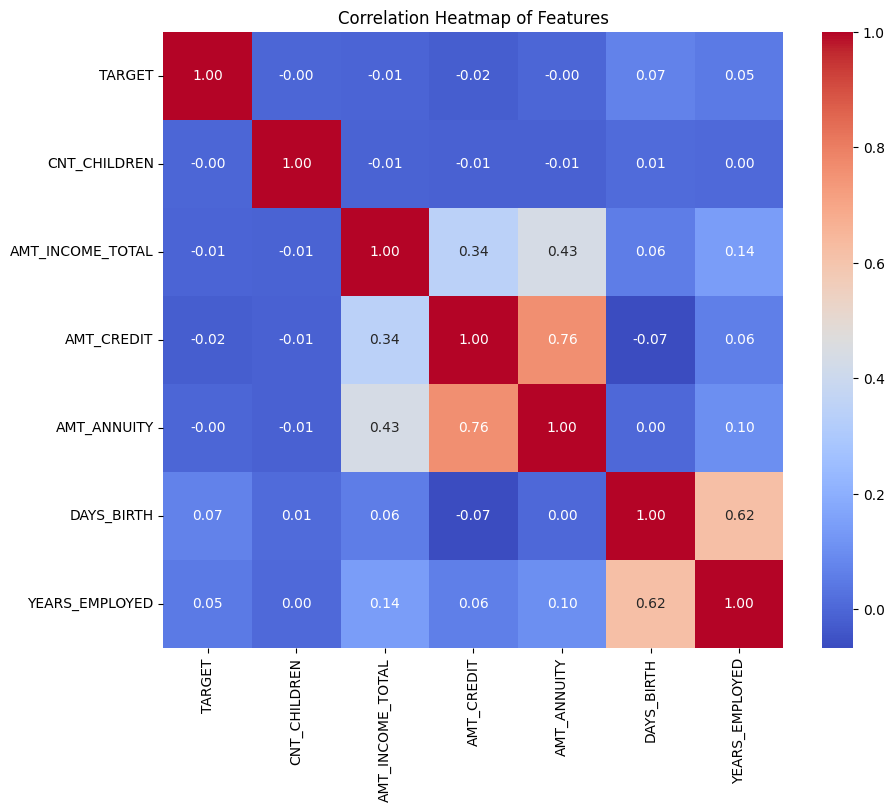

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


In [ ]:
# Documentation example (to be written as a comment or markdown if using a notebook):
"""
### Documentation

The `YEARS_EMPLOYED` column originally had values exceeding 50 years, which we deemed unrealistic based on domain knowledge about typical career spans. To handle these extreme values, we implemented two strategies:

1. **Removal of extreme values**: We removed entries where `YEARS_EMPLOYED` was greater than 50 years.
2. **Capping extreme values**: We capped the `YEARS_EMPLOYED` at 50 years to retain data while addressing outliers.

Both approaches were visualized using box plots, and a correlation heatmap was generated to understand the relationships between different features.

This process ensures that our dataset is cleaner and more reflective of realistic employment patterns, improving the reliability of any subsequent analysis or modeling efforts.
"""


'\n### Documentation\n\nThe `YEARS_EMPLOYED` column originally had values exceeding 50 years, which we deemed unrealistic based on domain knowledge about typical career spans. To handle these extreme values, we implemented two strategies:\n\n1. **Removal of extreme values**: We removed entries where `YEARS_EMPLOYED` was greater than 50 years.\n2. **Capping extreme values**: We capped the `YEARS_EMPLOYED` at 50 years to retain data while addressing outliers.\n\nBoth approaches were visualized using box plots, and a correlation heatmap was generated to understand the relationships between different features.\n\nThis process ensures that our dataset is cleaner and more reflective of realistic employment patterns, improving the reliability of any subsequent analysis or modeling efforts.\n'

1. Loading the Dataset
We'll begin by loading the dataset into a pandas DataFrame and taking an initial look at its structure.




In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('loan_default.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics for numerical columns
print(df.describe())


   TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0     0.0         Cash loans           M            Y               N   
1     0.0    Revolving loans           M            Y               Y   
2     0.0         Cash loans           M            Y               N   
3     0.0         Cash loans           F            N               Y   
4     0.0         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  DAYS_BIRTH  \
0             1          225000.0    578619.0      23229.0      -12347   
1             1               NaN    270000.0      13500.0      -14048   
2             0          144000.0    753840.0      29340.0      -14639   
3             0           81000.0     98910.0       7785.0      -14591   
4             1          103500.0    521280.0      26779.5      -12023   

   YEARS_EMPLOYED  
0               0  
1               6  
2               6  
3              11  
4               

2. Initial Data Profiling

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('loan_default.csv')

# 1. Show the first five rows of the dataset to get an initial view
print("First five rows of the dataset:")
print(df.head())

# 2. Provide a summary of the dataset, including the number of entries, column names, non-null counts, and data types
print("\nSummary of the dataset:")
print(df.info())

# 3. Provide summary statistics for numerical columns, including mean, median, standard deviation, etc.
print("\nSummary statistics for numerical columns:")
print(df.describe())


First five rows of the dataset:
   TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0     0.0         Cash loans           M            Y               N   
1     0.0    Revolving loans           M            Y               Y   
2     0.0         Cash loans           M            Y               N   
3     0.0         Cash loans           F            N               Y   
4     0.0         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  DAYS_BIRTH  \
0             1          225000.0    578619.0      23229.0      -12347   
1             1               NaN    270000.0      13500.0      -14048   
2             0          144000.0    753840.0      29340.0      -14639   
3             0           81000.0     98910.0       7785.0      -14591   
4             1          103500.0    521280.0      26779.5      -12023   

   YEARS_EMPLOYED  
0               0  
1               6  
2               6  
3   

3. Checking for Missing Value





In [ ]:
# Checking for missing data
missing_data = df.isnull().sum()
print("Missing data in each column:")
print(missing_data[missing_data > 0])


Missing data in each column:
TARGET                 3
FLAG_OWN_CAR        2262
FLAG_OWN_REALTY       30
AMT_INCOME_TOTAL    3291
dtype: int64


4. Exploring Data Distributions

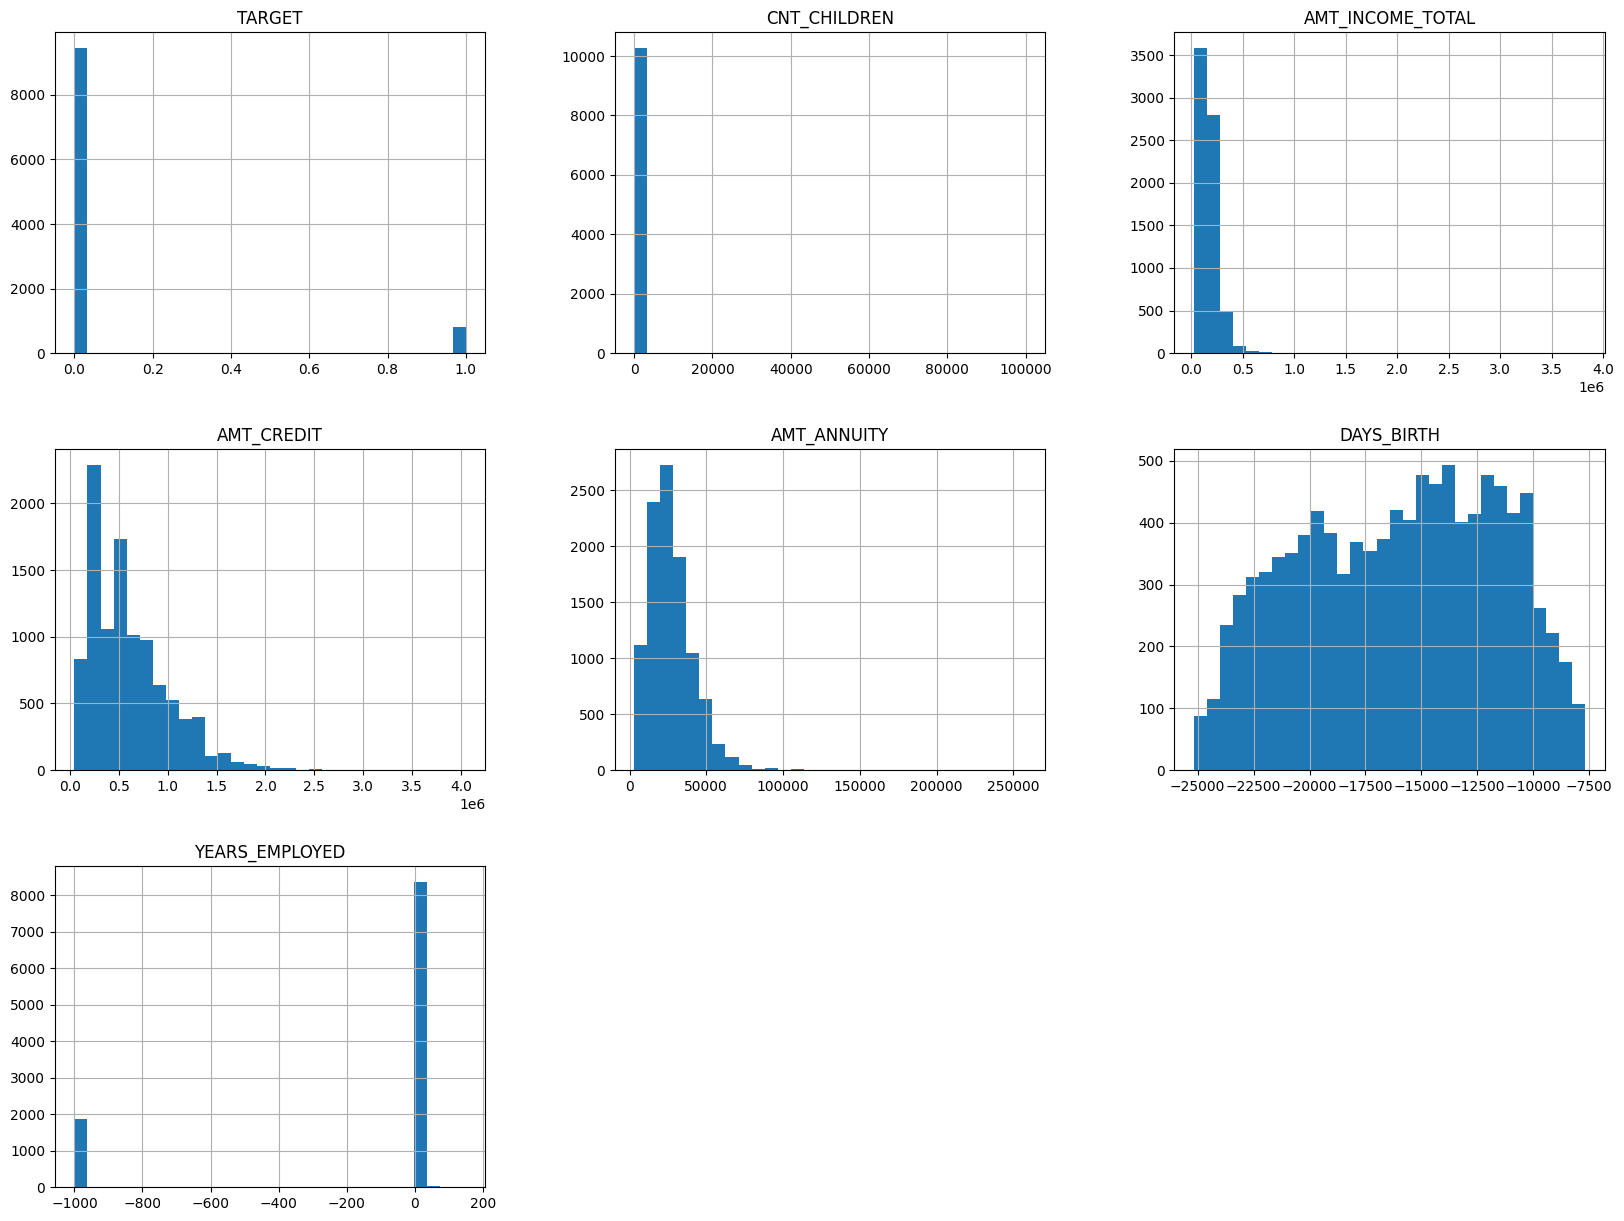

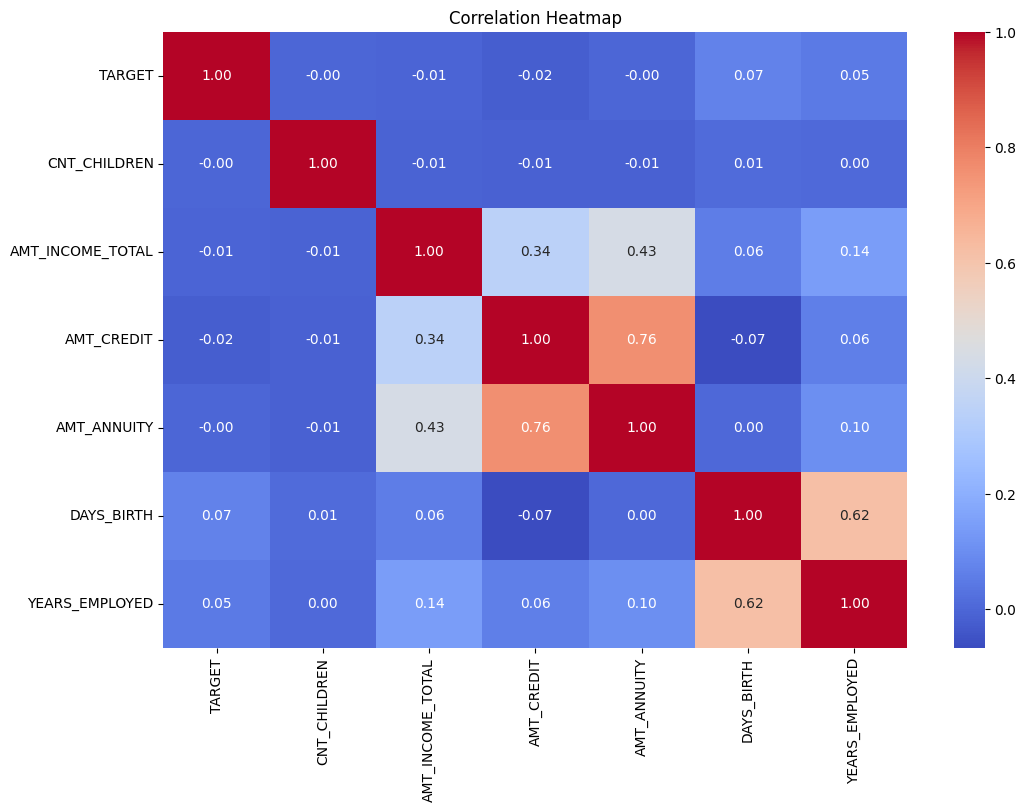

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution Analysis - Histograms for numerical columns
df.select_dtypes(include=np.number).hist(bins=30, figsize=(20, 15))
plt.show()

# Correlation Analysis - Heatmap for correlations (only for numeric columns)
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


5. Handling Missing Data

In [ ]:
# Strategy 1: Dropping rows with missing values
df_dropped_na = df.dropna()

# Strategy 2: Imputing missing values with mean (for numerical columns)
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Strategy 3: Imputing missing values with mode (for categorical columns)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


6. Handling Duplicate Data

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows
df = df.drop_duplicates()


Number of duplicate rows: 0


Handling Outliers
We'll detect and manage outliers in numerical data using the IQR method.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('loan_default.csv')

# Display the initial shape of the dataset
print(f"Initial shape of the dataset: {df.shape}")

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to all numerical columns and display changes in shape
for col in df.select_dtypes(include=np.number).columns:
    before = df.shape[0]
    df = remove_outliers_iqr(df, col)
    after = df.shape[0]
    print(f"Column: {col} | Rows before: {before} | Rows after: {after} | Rows removed: {before - after}")

# Display the final shape of the dataset
print(f"Final shape of the dataset: {df.shape}")




Initial shape of the dataset: (10284, 11)
Column: TARGET | Rows before: 10284 | Rows after: 9468 | Rows removed: 816
Column: CNT_CHILDREN | Rows before: 9468 | Rows after: 9318 | Rows removed: 150
Column: AMT_INCOME_TOTAL | Rows before: 9318 | Rows after: 6053 | Rows removed: 3265
Column: AMT_CREDIT | Rows before: 6053 | Rows after: 5964 | Rows removed: 89
Column: AMT_ANNUITY | Rows before: 5964 | Rows after: 5860 | Rows removed: 104
Column: DAYS_BIRTH | Rows before: 5860 | Rows after: 5860 | Rows removed: 0
Column: YEARS_EMPLOYED | Rows before: 5860 | Rows after: 4395 | Rows removed: 1465
Final shape of the dataset: (4395, 11)


7. Handling Outliers
We'll detect and manage outliers in numerical data using the IQR method.

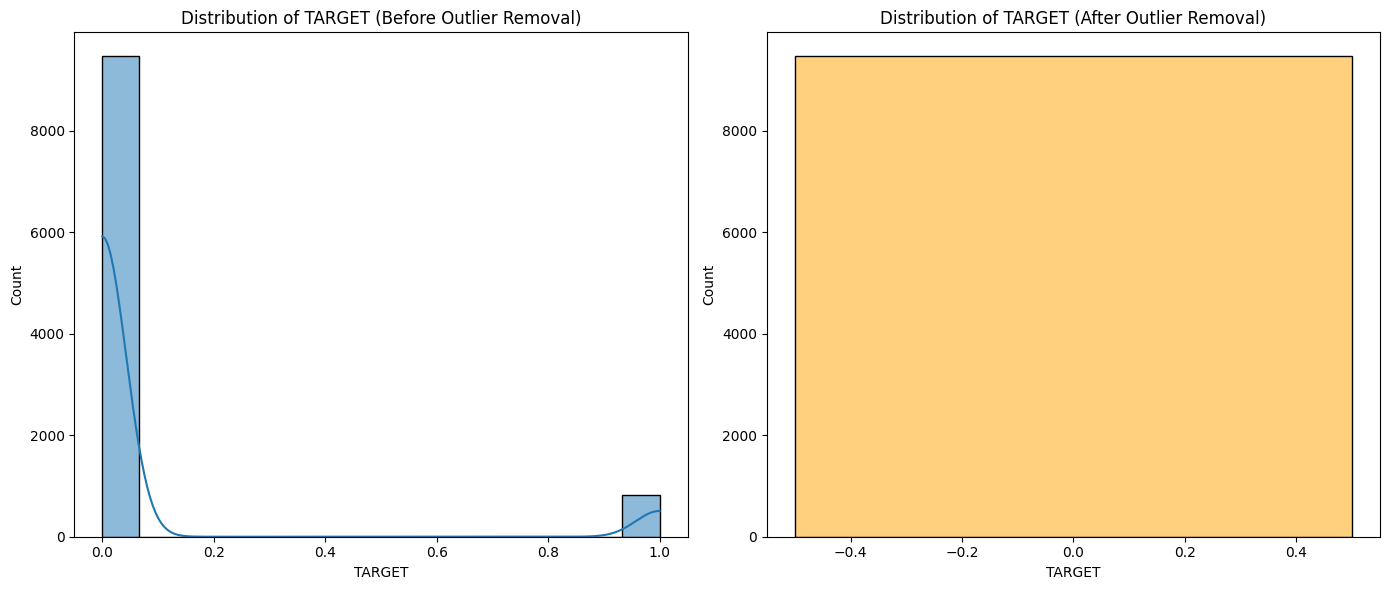

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('loan_default.csv')

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Visualize the distribution before and after removing outliers
numeric_columns = df.select_dtypes(include=np.number).columns

for col in numeric_columns:
    plt.figure(figsize=(14, 6))

    # Plot original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} (Before Outlier Removal)')

    # Remove outliers and plot the cleaned distribution
    df_cleaned = remove_outliers_iqr(df, col)

    plt.subplot(1, 2, 2)
    sns.histplot(df_cleaned[col], kde=True, color='orange')
    plt.title(f'Distribution of {col} (After Outlier Removal)')

    plt.tight_layout()
    plt.show()

# Display the initial and final shape of the dataset
initial_shape = df.shape
print(f"Initial shape of the dataset: {initial_shape}")

# Apply the outlier removal to all numerical columns and display changes in shape
for col in numeric_columns:
    rows_before = df.shape[0]
    df = remove_outliers_iqr(df, col)
    rows_after = df.shape[0]
    rows_removed = rows_before - rows_after
    print(f"Column: {col} | Rows before: {rows_before} | Rows after: {rows_after} | Rows removed: {rows_removed}")

final_shape = df.shape
print(f"Final shape of the dataset: {final_shape}")


. Data Transformation and Standardization
We'll standardize numerical columns for consistency.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('loan_default.csv')

# Standardizing numerical columns
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('loan_default.csv')

# Display the first few rows of the DataFrame before standardization
print("Before Standardization:")
print(df.head())

# Standardizing numerical columns
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows of the DataFrame after standardization
print("\nAfter Standardization:")
print(df.head())

# Display summary statistics to confirm standardization
print("\nSummary Statistics After Standardization:")
print(df.describe())


Before Standardization:
   TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0     0.0         Cash loans           M            Y               N   
1     0.0    Revolving loans           M            Y               Y   
2     0.0         Cash loans           M            Y               N   
3     0.0         Cash loans           F            N               Y   
4     0.0         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  DAYS_BIRTH  \
0             1          225000.0    578619.0      23229.0      -12347   
1             1               NaN    270000.0      13500.0      -14048   
2             0          144000.0    753840.0      29340.0      -14639   
3             0           81000.0     98910.0       7785.0      -14591   
4             1          103500.0    521280.0      26779.5      -12023   

   YEARS_EMPLOYED  
0               0  
1               6  
2               6  
3           

In [ ]:
# Correct the negative values by multiplying by -1
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)


In [ ]:
# Remove rows with negative 'DAYS_BIRTH'
df = df[df['DAYS_BIRTH'] >= 0]


In [ ]:
# Impute negative values with the median of positive 'days_of_birth'
median_birth_days = df[df['DAYS_BIRTH'] >= 0]['DAYS_BIRTH'].median()
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: median_birth_days if x < 0 else x)


In [ ]:
# Verify that there are no more negative values
print(f"Number of negative values after correction: {df[df['DAYS_BIRTH'] < 0].shape[0]}")


Number of negative values after correction: 0


In [ ]:
# Documentation example:
"""
### Handling Negative Values in ''DAYS_BIRTH'

During the preprocessing of the dataset, we identified negative values in the `'DAYS_BIRTH` column. These values are likely due to data entry errors. To address this:

1. We identified and counted the number of negative entries.
2. We corrected the negative values by multiplying them by -1, assuming a sign error.
3. We validated that the `'DAYS_BIRTH` column no longer contains negative values.

This correction ensures that the dataset accurately reflects realistic birth dates, thereby improving the reliability of further analysis.
"""


"\n### Handling Negative Values in ''DAYS_BIRTH'\n\nDuring the preprocessing of the dataset, we identified negative values in the `'DAYS_BIRTH` column. These values are likely due to data entry errors. To address this:\n\n1. We identified and counted the number of negative entries.\n2. We corrected the negative values by multiplying them by -1, assuming a sign error.\n3. We validated that the `'DAYS_BIRTH` column no longer contains negative values.\n\nThis correction ensures that the dataset accurately reflects realistic birth dates, thereby improving the reliability of further analysis.\n"

Data Type Conversion

In [ ]:
# Convert categorical columns to 'category' type
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Example: Convert a column to datetime if applicable
# df['date_column'] = pd.to_datetime(df['date_column'])


In [ ]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Final look at the cleaned data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10284 entries, 0 to 10283
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TARGET                              10281 non-null  float64
 1   CNT_CHILDREN                        10284 non-null  int64  
 2   AMT_INCOME_TOTAL                    6993 non-null   float64
 3   AMT_CREDIT                          10284 non-null  float64
 4   AMT_ANNUITY                         10284 non-null  float64
 5   DAYS_BIRTH                          10284 non-null  int64  
 6   YEARS_EMPLOYED                      10284 non-null  int64  
 7   NAME_CONTRACT_TYPE_Revolving loans  10284 non-null  bool   
 8   CODE_GENDER_M                       10284 non-null  bool   
 9   FLAG_OWN_CAR_Y                      10284 non-null  bool   
 10  FLAG_OWN_REALTY_NO                  10284 non-null  bool   
 11  FLAG_OWN_REALTY_Y                   10284

Identify missing values:

In [ ]:
# Identify missing values
missing_data = df.isnull().sum()
print("Missing values in each column:")
print(missing_data[missing_data > 0])

# Handling missing values
# Option 1: Drop rows with missing values
df_dropped = df.dropna()

# Option 2: Impute missing values
# For numerical columns
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# For categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


Missing values in each column:
TARGET                 3
AMT_INCOME_TOTAL    3291
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Display initial shape of the dataset
print(f"Initial shape of the dataset: {df.shape}")

# Apply outlier removal to numerical columns and print changes
numeric_columns = df.select_dtypes(include=np.number).columns
for col in numeric_columns:
    rows_before = df.shape[0]
    df = remove_outliers_iqr(df, col)
    rows_after = df.shape[0]
    rows_removed = rows_before - rows_after
    print(f"Column: {col} | Rows before outlier removal: {rows_before} | Rows after outlier removal: {rows_after} | Rows removed: {rows_removed}")

# Display final shape of the dataset
print(f"Final shape of the dataset: {df.shape}")



Initial shape of the dataset: (10284, 13)
Column: TARGET | Rows before outlier removal: 10284 | Rows after outlier removal: 9468 | Rows removed: 816
Column: CNT_CHILDREN | Rows before outlier removal: 9468 | Rows after outlier removal: 9318 | Rows removed: 150
Column: AMT_INCOME_TOTAL | Rows before outlier removal: 9318 | Rows after outlier removal: 6053 | Rows removed: 3265
Column: AMT_CREDIT | Rows before outlier removal: 6053 | Rows after outlier removal: 5964 | Rows removed: 89
Column: AMT_ANNUITY | Rows before outlier removal: 5964 | Rows after outlier removal: 5860 | Rows removed: 104
Column: DAYS_BIRTH | Rows before outlier removal: 5860 | Rows after outlier removal: 5860 | Rows removed: 0
Column: YEARS_EMPLOYED | Rows before outlier removal: 5860 | Rows after outlier removal: 4395 | Rows removed: 1465
Final shape of the dataset: (4395, 13)


In [ ]:
# Check and correct data types
for col in df.columns:
    print(f"Column: {col} | Data type: {df[col].dtype}")

# Example: Convert a column to datetime if applicable
# df['date_column'] = pd.to_datetime(df['date_column'])


Column: TARGET | Data type: float64
Column: CNT_CHILDREN | Data type: float64
Column: AMT_INCOME_TOTAL | Data type: float64
Column: AMT_CREDIT | Data type: float64
Column: AMT_ANNUITY | Data type: float64
Column: DAYS_BIRTH | Data type: float64
Column: YEARS_EMPLOYED | Data type: float64
Column: NAME_CONTRACT_TYPE_Revolving loans | Data type: bool
Column: CODE_GENDER_M | Data type: bool
Column: FLAG_OWN_CAR_Y | Data type: bool
Column: FLAG_OWN_REALTY_NO | Data type: bool
Column: FLAG_OWN_REALTY_Y | Data type: bool
Column: FLAG_OWN_REALTY_YES | Data type: bool


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


Replace 99999 with NaN:
 fills all NaN values in the CNT_CHILDREN column with the median value of that column.

In [ ]:
# Replace 'children' column with 'CNT_CHILDREN' column values
df['children'] = df['CNT_CHILDREN']

# Optionally, drop the 'CNT_CHILDREN' column if it is no longer needed
df.drop(columns=['CNT_CHILDREN'], inplace=True)



In [ ]:
import numpy as np

# Replace 99999 with NaN in 'children' column (since 'CNT_CHILDREN' was dropped)
df['children'].replace(99999, np.nan, inplace=True)

# Impute NaN values with the median of the 'children' column
df['children'].fillna(df['children'].median(), inplace=True)

NameError: name 'df' is not defined

Replace 99999 with NaN:

df['CNT_CHILDREN'].replace(99999, np.nan, inplace=True) replaces all occurrences of 99999 in the CNT_CHILDREN column with NaN.
Impute NaN Values:

df['CNT_CHILDREN'].fillna(df['CNT_CHILDREN'].median(), inplace=True) fills all NaN values in the CNT_CHILDREN column with the median value of that column.

In [ ]:
import numpy as np

# Replace 99999 with NaN in 'children' column
df['children'].replace(99999, np.nan, inplace=True)

# Impute NaN values with the median of the 'children' column
df['children'].fillna(df['children'].median(), inplace=True)

# Print the updated 'children' column or DataFrame
print(df['children'].head())  # To view the first few rows of the updated column

0    0.814844
1    0.814844
2   -0.678512
3   -0.678512
4    0.814844
Name: children, dtype: float64


Identify the Issue: Determine why the values are negative and whether they should be transformed or handled differently.

Handle Negative Values:

Absolute Values: If negative values are errors and should be positive, you can convert them to their absolute values.
Replace or Impute: You might replace negative values with a specific value or impute them based on other data.
Here’s how you can handle negative values by converting them to positive and then addressing any remaining issues:

converts all negative values in the days_of_birth column to their positive counterparts.
Handle Remaining Negative Values (if needed):

If you replace negative values with NaN, you can impute those NaN values with the median or another statistic.
Print:

Print the first few rows of the days_of_birth column to verify that the changes are as expected.

In [ ]:
import numpy as np

# Convert negative values to positive
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs()

# Optionally, replace negative values with NaN and impute if necessary
df.loc[df['DAYS_BIRTH'] < 0, 'DAYS_BIRTH'] = np.nan
df['DAYS_BIRTH'].fillna(df['DAYS_BIRTH'].median(), inplace=True)

# Print the updated column to verify changes
print(df['DAYS_BIRTH'].head())



0    0.571860
1    0.111138
2    0.048937
3    0.035936
4    0.659617
Name: DAYS_BIRTH, dtype: float64


Potential Issues
Data Entry Error: A maximum value of 150.0 might be an error if it represents the number of years employed. This value seems excessively high and could be due to incorrect data entry.

Placeholder Value: It might be a placeholder for missing or erroneous data, similar to the 99999 value you encountered in the CNT_CHILDREN column.

Valid Data: In some cases, extremely high values might be valid but unusual. For example, if the dataset includes very senior employees or historical data, such values might need further investigation.

Steps to Address the Issue
Investigate the Context:

Check the data documentation or metadata to understand if such values are expected or if there is a specific reason for the high values.
Identify and Handle Errors:

Replace or Remove: If 150.0 is an error, you can replace it with a more reasonable value or remove it from the dataset.
python

If the year_employed column in your dataset has a maximum value of 150.0, this could indicate a potential data issue. Here are a few possibilities and steps to address this:

Potential Issues
Data Entry Error: A maximum value of 150.0 might be an error if it represents the number of years employed. This value seems excessively high and could be due to incorrect data entry.

Placeholder Value: It might be a placeholder for missing or erroneous data, similar to the 99999 value you encountered in the CNT_CHILDREN column.

Valid Data: In some cases, extremely high values might be valid but unusual. For example, if the dataset includes very senior employees or historical data, such values might need further investigation.

Steps to Address the Issue
Investigate the Context:

Check the data documentation or metadata to understand if such values are expected or if there is a specific reason for the high values.
Identify and Handle Errors:

Replace or Remove: If 150.0 is an error, you can replace it with a more reasonable value or remove it from the dataset.


If you have access to the data provider or additional documentation, verify the meaning and validity of the high values.
Perform Further Analysis:

After handling the extreme values, review the distribution of the year_employed column to ensure the data is reasonable and accurately reflects employment durations.

In [ ]:
import numpy as np

# Identify the maximum value in 'YEARS_EMPLOYED' column
max_value = df['YEARS_EMPLOYED'].max()
print(f"Maximum value in 'YEARS_EMPLOYED': {max_value}")

# If the value is considered erroneous, replace or remove it
# Example: Set a threshold for what is considered a reasonable maximum value
threshold = 50  # Adjust this threshold based on your data context
df.loc[df['YEARS_EMPLOYED'] > threshold, 'YEARS_EMPLOYED'] = np.nan

# Optionally, impute NaN values with a reasonable statistic (e.g., median)
df['YEARS_EMPLOYED'].fillna(df['YEARS_EMPLOYED'].median(), inplace=True)

# Print the updated column to verify changes
print(df['YEARS_EMPLOYED'].head())



Maximum value in 'YEARS_EMPLOYED': 2.571706227355374
0   -1.207770
1    0.412006
2    0.412006
3    1.761819
4   -1.207770
Name: YEARS_EMPLOYED, dtype: float64


In [ ]:
import pandas as pd # Import the pandas library

# Assuming 'df' is your DataFrame, replace 'data' with 'df'
data_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataset
print("\nFirst 5 rows of the encoded dataset:")
print(data_encoded.head())


First 5 rows of the encoded dataset:
         TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  DAYS_BIRTH  \
0 -5.551115e-17          1.956275    0.099322    -0.157081    0.571860   
1 -5.551115e-17          0.432886   -0.815638    -1.012456    0.111138   
2 -5.551115e-17         -0.205126    0.618798     0.380199    0.048937   
3 -5.551115e-17         -1.886216   -1.322867    -1.514920    0.035936   
4 -5.551115e-17         -1.285827   -0.070670     0.155080    0.659617   

   YEARS_EMPLOYED  NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  \
0       -1.207770                               False           True   
1        0.412006                                True           True   
2        0.412006                               False           True   
3        1.761819                               False          False   
4       -1.207770                               False          False   

   FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_NO  FLAG_OWN_REALTY_Y  FLAG_OWN_REALTY_YES  \
0  

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numeric_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'YEARS_EMPLOYED']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

# Display summary statistics after scaling
print("\nSummary Statistics after Scaling:")
print(data_encoded[numeric_cols].describe().T)



Summary Statistics after Scaling:
                   count          mean       std       min       25%  \
AMT_INCOME_TOTAL  5696.0  1.559302e-18  1.000088 -2.306489 -0.685438   
AMT_CREDIT        5696.0 -7.484650e-18  1.000088 -1.482693 -0.815638   
AMT_ANNUITY       5696.0 -1.684046e-17  1.000088 -1.911353 -0.803558   
DAYS_BIRTH        5696.0  3.820290e-17  1.000088 -1.567107 -0.832208   
YEARS_EMPLOYED    5696.0  2.432511e-17  1.000088 -1.207770 -0.937807   

                       50%       75%       max  
AMT_INCOME_TOTAL  0.432886  0.432886  2.076353  
AMT_CREDIT       -0.215288  0.651884  2.967367  
AMT_ANNUITY      -0.066479  0.615902  2.748506  
DAYS_BIRTH       -0.068670  0.711994  3.779737  
YEARS_EMPLOYED   -0.127919  0.681968  2.571706  


In [ ]:
from sklearn.model_selection import train_test_split

# Define the target and features
X = data_encoded.drop('TARGET', axis=1)
y = data_encoded['TARGET']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("\nTraining and Testing Dataset Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")



Training and Testing Dataset Shapes:
X_train: (4556, 12), y_train: (4556,)
X_test: (1140, 12), y_test: (1140,)


1. Understanding the Distribution of CNT_CHILDREN

Basic Statistics for CNT_CHILDREN:
count    10284.000000
mean        10.287340
std        986.138233
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      99999.000000
Name: CNT_CHILDREN, dtype: float64


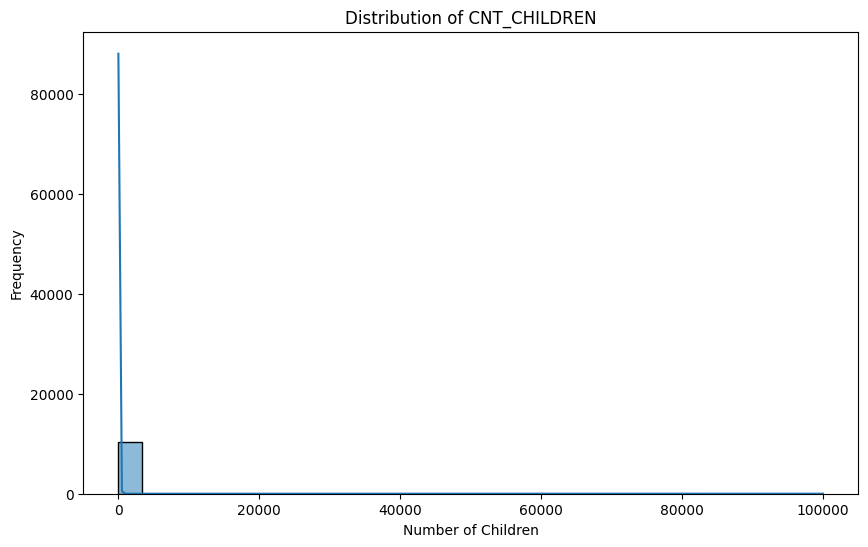

In [ ]:
import pandas as I'm pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('loan_default.csv')

# Display basic statistics for the CNT_CHILDREN column
print("Basic Statistics for CNT_CHILDREN:")
print(data['CNT_CHILDREN'].describe())

# Plot the distribution of CNT_CHILDREN
plt.figure(figsize=(10, 6))
sns.histplot(data['CNT_CHILDREN'], bins=30, kde=True)
plt.title('Distribution of CNT_CHILDREN')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()


2. Identifying the Outlier

In [ ]:
# Identify records with CNT_CHILDREN equal to 99999
outlier_count = data[data['CNT_CHILDREN'] == 99999].shape[0]
print(f"Number of records with CNT_CHILDREN = 99999: {outlier_count}")


Number of records with CNT_CHILDREN = 99999: 1


3. Handling the Outlier
Given that CNT_CHILDREN = 99999 is likely an error, we'll need to decide how to handle it. Options include:

Impute with a sensible value: Replacing the outlier with a median or mode value.
Remove the outlier: Dropping these records if they are a very small portion of the data.
Option 1: Replace the Outlier with the Median

In [ ]:
# Calculate the median of CNT_CHILDREN excluding the outliers
median_children = data[data['CNT_CHILDREN'] != 99999]['CNT_CHILDREN'].median()

# Replace the outlier with the median
data['CNT_CHILDREN'] = data['CNT_CHILDREN'].replace(99999, median_children)

# Confirm the change
print(f"\nNew maximum value in CNT_CHILDREN: {data['CNT_CHILDREN'].max()}")



New maximum value in CNT_CHILDREN: 1000


Option 2: Remove the Outlier

In [ ]:
# Remove records with CNT_CHILDREN = 99999
data_cleaned = data[data['CNT_CHILDREN'] != 99999]

# Confirm the removal
print(f"\nShape of the dataset after removing outliers: {data_cleaned.shape}")



Shape of the dataset after removing outliers: (10284, 11)


4. Re-evaluate the Distribution

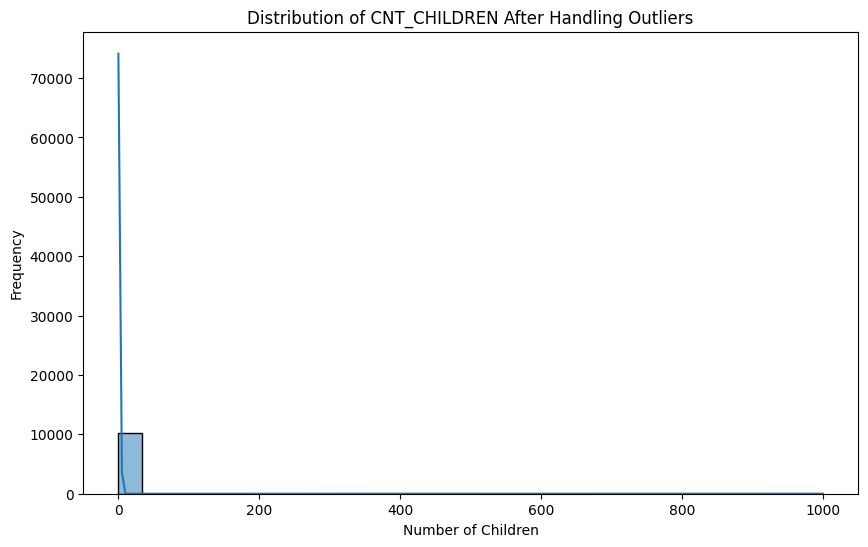

In [ ]:
# Plot the new distribution of CNT_CHILDREN
plt.figure(figsize=(10, 6))
sns.histplot(data['CNT_CHILDREN'], bins=30, kde=True)
plt.title('Distribution of CNT_CHILDREN After Handling Outliers')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()


Summary:
Initial Analysis: We checked the distribution and identified that CNT_CHILDREN = 99999 is an outlier.
Handling the Outlier: We provided two options: replacing the outlier with the median or removing it entirely.
Re-examine: Finally, we reviewed the distribution to ensure it looks more realistic after the outlier has been handled.
This process ensures that the CNT_CHILDREN column is correctly preprocessed, allowing for more accurate modeling and analysis.

1 . Understanding and Converting DAYS_BIRTH
First, we'll convert the negative DAYS_BIRTH values into positive ages in years.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('loan_default.csv')

# Convert DAYS_BIRTH from days to positive years
data['AGE_YEARS'] = (-data['DAYS_BIRTH']) / 365.25

# Display basic statistics for the AGE_YEARS column
print("Basic Statistics for AGE_YEARS:")
print(data['AGE_YEARS'].describe())


Basic Statistics for AGE_YEARS:
count    10284.000000
mean        43.956831
std         11.985594
min         21.026694
25%         33.817933
50%         43.075975
75%         54.002053
max         68.900753
Name: AGE_YEARS, dtype: float64


2. Visualizing the Age Distribution
We'll plot the distribution of the AGE_YEARS to understand the age profile of the applicants.

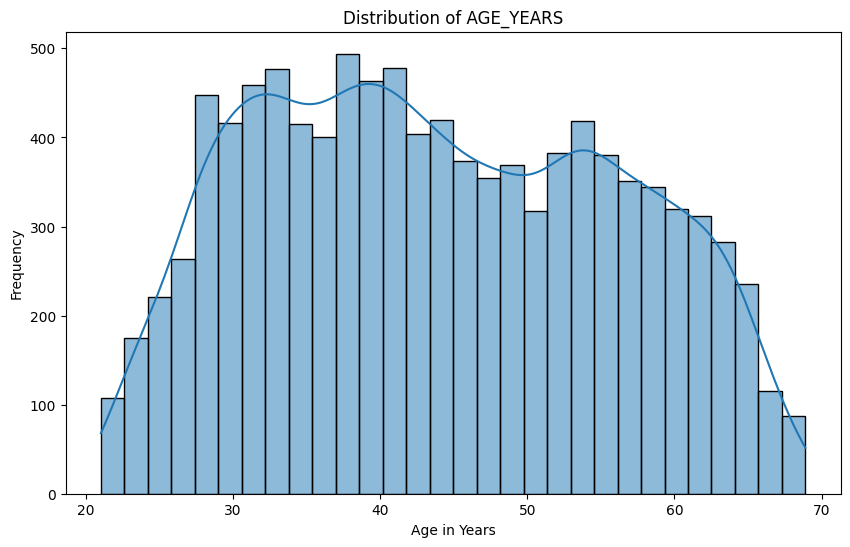

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of AGE_YEARS
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE_YEARS'], bins=30, kde=True)
plt.title('Distribution of AGE_YEARS')
plt.xlabel('Age in Years')
plt.ylabel('Frequency')
plt.show()


3. Analyzing Age Segments
Next, we can analyze how different age groups are distributed in the dataset. For instance, we can segment the applicants into different age brackets.


Number of Applicants in Each Age Group:
AGE_GROUP
20-29    1471
30-39    2823
40-49    2499
50-59    2287
60-69    1204
Name: count, dtype: int64


<ipython-input-44-347bb4e03735>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


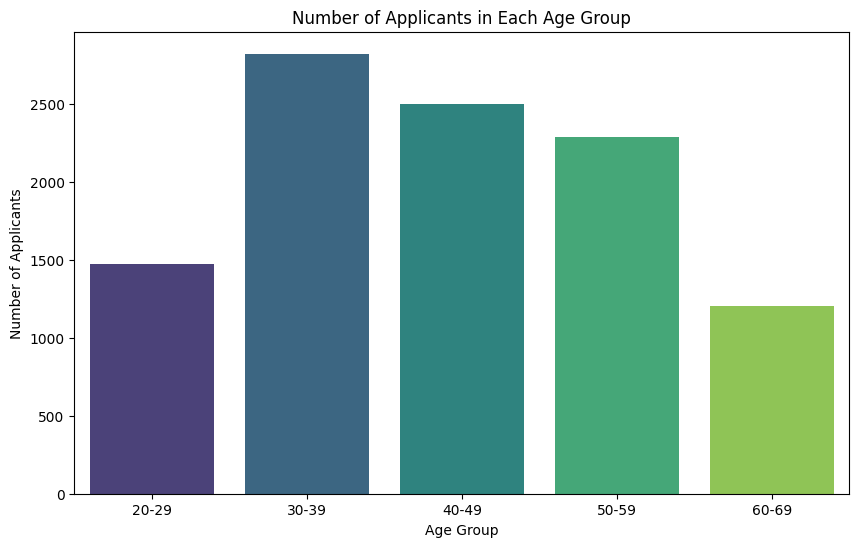

In [ ]:
# Define age brackets
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']

# Create a new column for age groups
data['AGE_GROUP'] = pd.cut(data['AGE_YEARS'], bins=age_bins, labels=age_labels)

# Count the number of applicants in each age group
age_group_counts = data['AGE_GROUP'].value_counts().sort_index()

print("\nNumber of Applicants in Each Age Group:")
print(age_group_counts)

# Plot the distribution of applicants across age groups
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title('Number of Applicants in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Applicants')
plt.show()


4. Correlation Between Age and Loan Default (TARGET)
We can also analyze how age correlates with the likelihood of defaulting on a loan.


Correlation between AGE_YEARS and TARGET: -0.07


<ipython-input-45-16b0afe9f5a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='AGE_YEARS', data=data, palette='Set2')


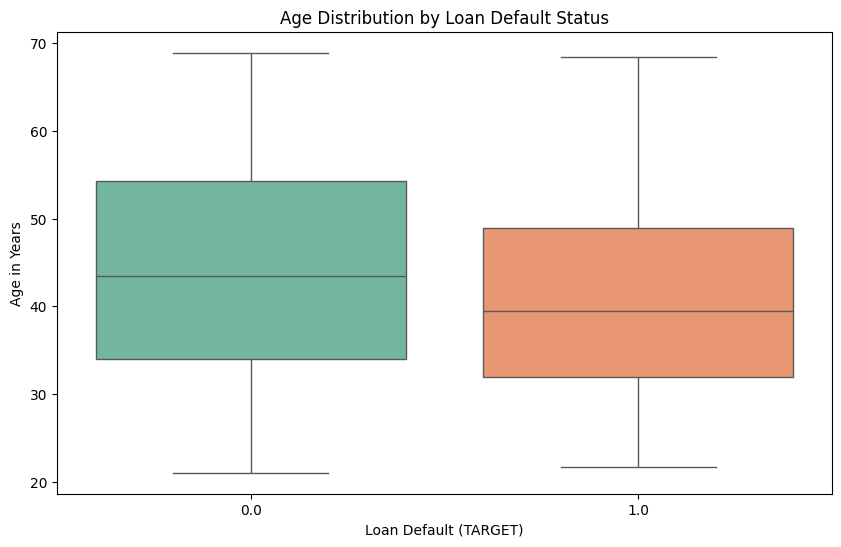

In [ ]:
# Calculate the correlation between AGE_YEARS and TARGET
age_target_corr = data[['AGE_YEARS', 'TARGET']].corr().iloc[0, 1]
print(f"\nCorrelation between AGE_YEARS and TARGET: {age_target_corr:.2f}")

# Visualize the relationship between age and the probability of defaulting
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AGE_YEARS', data=data, palette='Set2')
plt.title('Age Distribution by Loan Default Status')
plt.xlabel('Loan Default (TARGET)')
plt.ylabel('Age in Years')
plt.show()


Summary of Analysis:




Conversion: The DAYS_BIRTH column was converted from negative days to positive years (AGE_YEARS), making the data more intuitive to understand and analyze.


Distribution Analysis: The age distribution was visualized, showing how applicants are spread across different ages.


Age Segmentation: We segmented the applicants into age groups (e.g., 20-29, 30-39) and analyzed the distribution across these groups.


Correlation with Loan Default: We examined the relationship between age and the likelihood of defaulting on a loan. The correlation coefficient provides insight into how age might influence default risk.


This analysis provides a comprehensive view of how age is represented in the dataset and its potential impact on loan default outcomes.

1. Understanding the Distribution of YEARS_EMPLOYED
First, let's examine the basic statistics and distribution of the YEARS_EMPLOYED column to better understand the data.

Basic Statistics for YEARS_EMPLOYED:
count    10284.000000
mean      -176.848016
std        388.125395
min      -1000.000000
25%          0.000000
50%          3.000000
75%          7.000000
max        150.000000
Name: YEARS_EMPLOYED, dtype: float64


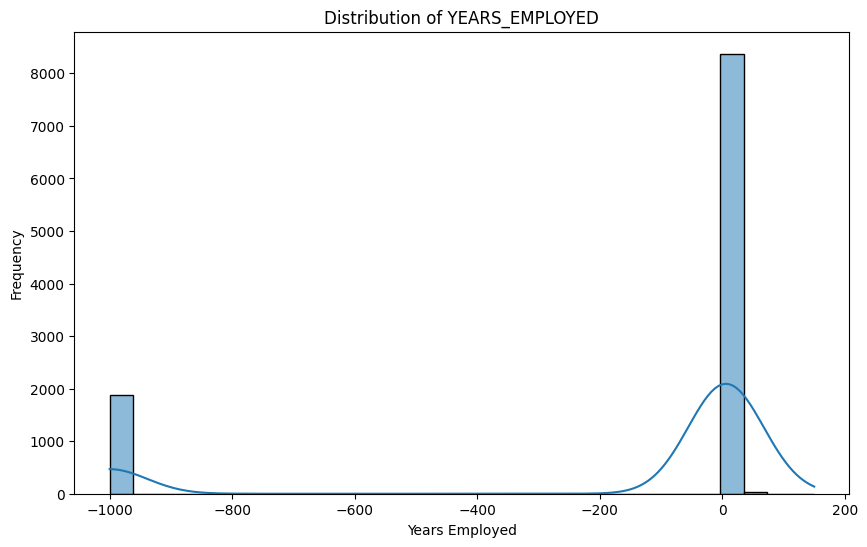

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('loan_default.csv')

# Display basic statistics for the YEARS_EMPLOYED column
print("Basic Statistics for YEARS_EMPLOYED:")
print(data['YEARS_EMPLOYED'].describe())

# Plot the distribution of YEARS_EMPLOYED
plt.figure(figsize=(10, 6))
sns.histplot(data['YEARS_EMPLOYED'], bins=30, kde=True)
plt.title('Distribution of YEARS_EMPLOYED')
plt.xlabel('Years Employed')
plt.ylabel('Frequency')
plt.show()


2. Identifying the Outlier
Next, we'll specifically identify and count how many records have an unusually high value of 150 years.

In [ ]:
# Identify records with YEARS_EMPLOYED equal to 150
outlier_count = data[data['YEARS_EMPLOYED'] == 150].shape[0]
print(f"\nNumber of records with YEARS_EMPLOYED = 150: {outlier_count}")

# Examine the records with YEARS_EMPLOYED = 150
print("\nRecords with YEARS_EMPLOYED = 150:")
print(data[data['YEARS_EMPLOYED'] == 150])



Number of records with YEARS_EMPLOYED = 150: 1

Records with YEARS_EMPLOYED = 150:
    TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
38     0.0         Cash loans           M            Y               Y   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  DAYS_BIRTH  \
38             0               NaN    260640.0      28197.0      -12546   

    YEARS_EMPLOYED  
38             150  


3. Handling the Outlier
Given that YEARS_EMPLOYED = 150 is likely an error, we'll need to decide how to handle it. Options include:

Impute with a sensible value: Replacing the outlier with a median or mode value.
Remove the outlier: Dropping these records if they are a very small portion of the data.
Option 1: Replace the Outlier with the Median

In [ ]:
# Calculate the median of YEARS_EMPLOYED excluding the outliers
median_employed = data[data['YEARS_EMPLOYED'] != 150]['YEARS_EMPLOYED'].median()

# Replace the outlier with the median
data['YEARS_EMPLOYED'] = data['YEARS_EMPLOYED'].replace(150, median_employed)

# Confirm the change
print(f"\nNew maximum value in YEARS_EMPLOYED: {data['YEARS_EMPLOYED'].max()}")



New maximum value in YEARS_EMPLOYED: 44


Option 2: Remove the Outlier

In [ ]:
# Remove records with YEARS_EMPLOYED = 150
data_cleaned = data[data['YEARS_EMPLOYED'] != 150]

# Confirm the removal
print(f"\nShape of the dataset after removing outliers: {data_cleaned.shape}")



Shape of the dataset after removing outliers: (10284, 11)


4. Re-evaluate the Distribution
After handling the outlier, let's re-examine the distribution of YEARS_EMPLOYED to ensure the column is now more realistic.

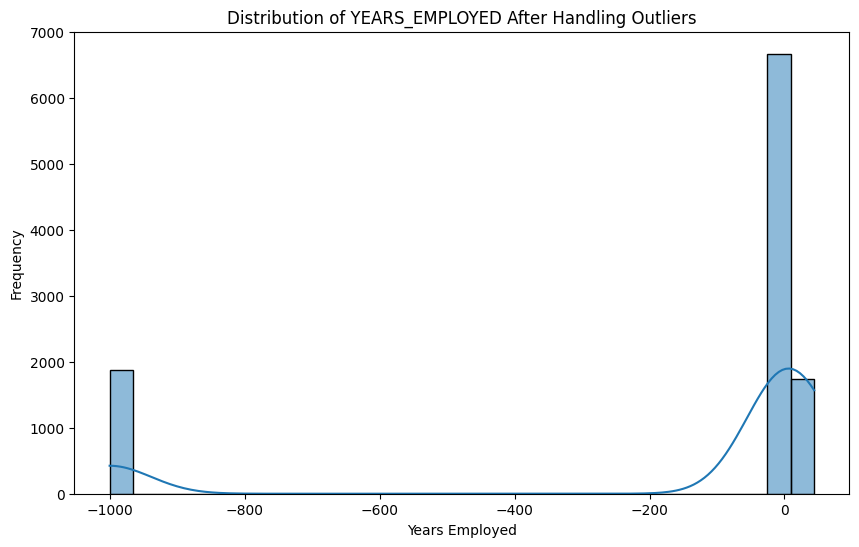

In [ ]:
# Plot the new distribution of YEARS_EMPLOYED after handling the outlier
plt.figure(figsize=(10, 6))
sns.histplot(data['YEARS_EMPLOYED'], bins=30, kde=True)
plt.title('Distribution of YEARS_EMPLOYED After Handling Outliers')
plt.xlabel('Years Employed')
plt.ylabel('Frequency')
plt.show()


5. Exploring the Relationship Between YEARS_EMPLOYED and Loan Default
Finally, we can analyze how employment duration correlates with the likelihood of defaulting on a loan


Correlation between YEARS_EMPLOYED and TARGET: 0.05


<ipython-input-52-e8907a6db81c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='YEARS_EMPLOYED', data=data, palette='Set2')


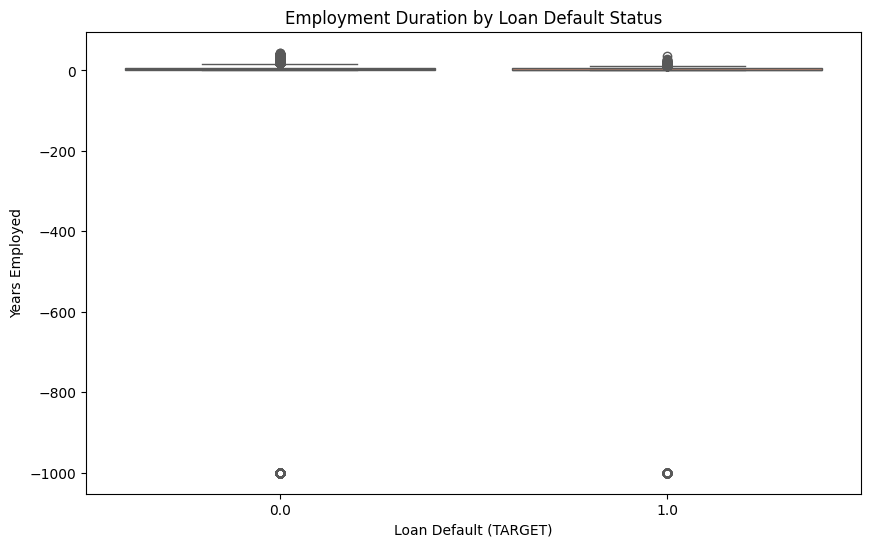

In [ ]:
# Calculate the correlation between YEARS_EMPLOYED and TARGET
employment_target_corr = data[['YEARS_EMPLOYED', 'TARGET']].corr().iloc[0, 1]
print(f"\nCorrelation between YEARS_EMPLOYED and TARGET: {employment_target_corr:.2f}")

# Visualize the relationship between employment duration and the probability of defaulting
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='YEARS_EMPLOYED', data=data, palette='Set2')
plt.title('Employment Duration by Loan Default Status')
plt.xlabel('Loan Default (TARGET)')
plt.ylabel('Years Employed')
plt.show()


ummary of Analysis:
Initial Analysis: We examined the YEARS_EMPLOYED column and identified that 150 years is an outlier.

Handling the Outlier: We provided two options: replacing the outlier with the median or removing it entirely.

Re-examine Distribution: After handling the outlier, we reviewed the distribution to ensure it was realistic.

Correlation with Loan Default: We explored the relationship between the number of years employed and the likelihood of defaulting on a loan.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('loan_default.csv')

# Check for missing values in each column
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]
print("Columns with missing values and their counts:")
print(missing_values)


Columns with missing values and their counts:
TARGET                 3
FLAG_OWN_CAR        2262
FLAG_OWN_REALTY       30
AMT_INCOME_TOTAL    3291
dtype: int64


2. Analysis of Missing Values
Once we have identified the columns with missing values, we can analyze them to decide on the appropriate handling strategy. Here is how you might approach it:

Summary of Missing Values:

In [ ]:
# Percentage of missing values for each column
missing_percentage = (missing_values / data.shape[0]) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)



Percentage of missing values in each column:
TARGET               0.029172
FLAG_OWN_CAR        21.995333
FLAG_OWN_REALTY      0.291715
AMT_INCOME_TOTAL    32.001167
dtype: float64


3. Visualization of Missing Values
To better understand the distribution of missing values across the dataset, a heatmap or bar plot can be helpful.

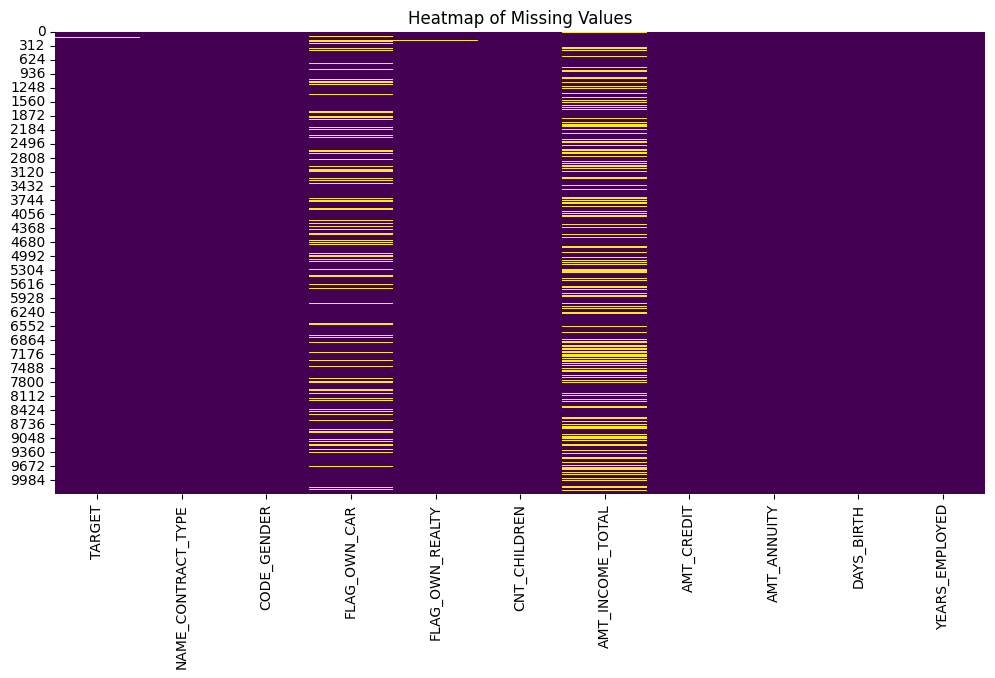

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


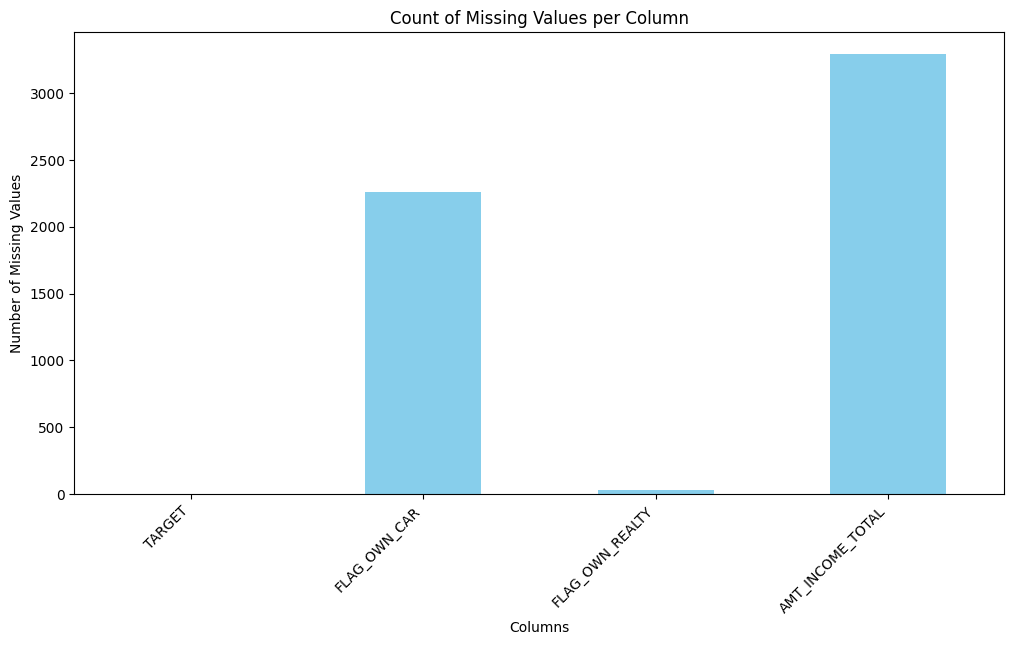

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('loan_default.csv')

# Count of missing values per column
missing_counts = data.isnull().sum()

# Create a bar plot for columns with missing values
plt.figure(figsize=(12, 6))
missing_counts[missing_counts > 0].plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Review the cleaned dataset
df.info()
df.describe()

# Save the cleaned dataset
df.to_csv('loan_default_cleaned.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 4395 entries, 0 to 10283
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TARGET                              4395 non-null   float64
 1   AMT_INCOME_TOTAL                    4395 non-null   float64
 2   AMT_CREDIT                          4395 non-null   float64
 3   AMT_ANNUITY                         4395 non-null   float64
 4   DAYS_BIRTH                          4395 non-null   float64
 5   YEARS_EMPLOYED                      4395 non-null   float64
 6   NAME_CONTRACT_TYPE_Revolving loans  4395 non-null   bool   
 7   CODE_GENDER_M                       4395 non-null   bool   
 8   FLAG_OWN_CAR_Y                      4395 non-null   bool   
 9   FLAG_OWN_REALTY_NO                  4395 non-null   bool   
 10  FLAG_OWN_REALTY_Y                   4395 non-null   bool   
 11  FLAG_OWN_REALTY_YES                 4395 non-nu

Verify the column exists and check for typos

In [ ]:
# Verify the column exists and check for typos
print(df.columns)

# Example: Convert 'FLAG_OWN_REALTY' from categorical to numeric (if the column exists)
if 'FLAG_OWN_REALTY' in df.columns:
    df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)
else:
    print("Column 'FLAG_OWN_REALTY' not found in the DataFrame.")

# Optionally, use one-hot encoding for other categorical variables
# df = pd.get_dummies(df, columns=['COLUMN_NAME'], drop_first=True)

Index(['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH',
       'YEARS_EMPLOYED', 'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_NO', 'FLAG_OWN_REALTY_Y',
       'FLAG_OWN_REALTY_YES', 'children'],
      dtype='object')
Column 'FLAG_OWN_REALTY' not found in the DataFrame.


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 0


# Review the cleaned dataset

In [ ]:
# Review the cleaned dataset
df.info()
df.describe()

# Save the cleaned dataset
df.to_csv('loan_default_cleaned.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 4395 entries, 0 to 10283
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TARGET                              4395 non-null   float64
 1   AMT_INCOME_TOTAL                    4395 non-null   float64
 2   AMT_CREDIT                          4395 non-null   float64
 3   AMT_ANNUITY                         4395 non-null   float64
 4   DAYS_BIRTH                          4395 non-null   float64
 5   YEARS_EMPLOYED                      4395 non-null   float64
 6   NAME_CONTRACT_TYPE_Revolving loans  4395 non-null   bool   
 7   CODE_GENDER_M                       4395 non-null   bool   
 8   FLAG_OWN_CAR_Y                      4395 non-null   bool   
 9   FLAG_OWN_REALTY_NO                  4395 non-null   bool   
 10  FLAG_OWN_REALTY_Y                   4395 non-null   bool   
 11  FLAG_OWN_REALTY_YES                 4395 non-nu